In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

In [2]:
folder = os.path.join('..', 'outputs', 'saved_run_20231123t120523')
# folder = os.path.join('..', 'outputs', 'saved_run_20231127t142955')

In [3]:
reader = emcee.backends.HDFBackend(os.path.join(folder, 'backend.hdf'))

In [4]:
chain = reader.get_chain()
nstep, nwalker, ndim = chain.shape

In [5]:
print(f"(nstep, nwalker, ndim):  {chain.shape}")

(nstep, nwalker, ndim):  (31794, 152, 19)


In [6]:
acc_rate = reader.accepted/chain.shape[0]

In [7]:
print(acc_rate.mean())

0.0890624430958506


In [8]:
tau = reader.get_autocorr_time(tol=1)

In [9]:
print(tau.mean())
print(np.median(tau))

2118.9597889260763
2088.858384169687


In [10]:
print(tau)

[2288.19632078 2010.5185071  1989.79387481 2053.10447094 2184.14381422
 2050.07694456 1912.4179772  2037.26883873 2088.85838417 2541.98143969
 2092.32436438 2067.84998997 1988.94191523 1991.93716171 2324.1964679
 2175.47979324 2142.75219908 2108.23957866 2212.15394722]


In [11]:
ndx_max = np.argmax(tau)
print(f"index of max tau:  {ndx_max}")
print(f"max. tau value:  {tau[ndx_max]}")

index of max tau:  9
max. tau value:  2541.9814396911847


In [12]:
# plt.plot(chain[:, :, ndx_max])
# plt.show()

In [13]:
# plt.plot(chain[:, :, 20])
# plt.show()

In [14]:
discard = int(6*tau.max())
thin_factor = 4
flat_chain = reader.get_chain(discard=discard, flat=True
                              , thin=int(tau.min()/thin_factor))
print(flat_chain.shape)

(5168, 19)


In [15]:
labels = ["idark", "S-L", "S-M", "LF1-L", "LF1-M", "LF2-L", "LF2-M", "LF3-L", "LF3-M", "MF-L", "MF-M", "HF-L", "HF-M"
          , "C3", "C4", "C5", "T3", "T4", "T5"]

# labels = ["idark", "S-L", "S-M", "LF1-L", "LF1-M", "LF2-L", "LF2-M", "LF3-L", "LF3-M", "MF-L", "MF-M", "HF-L", "HF-M"
#           , "C1", "C2", "C3", "C4", "C5", "T1", "T2", "T3", "T4", "T5"]
# labels = ["T3", "T4", "T5"]

0


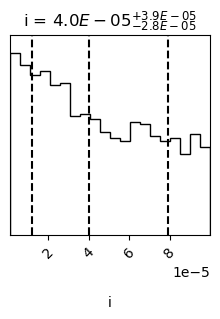

1


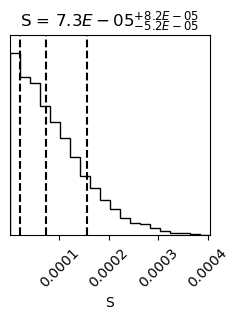

2


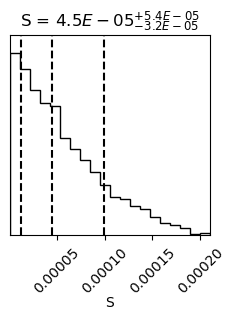

3


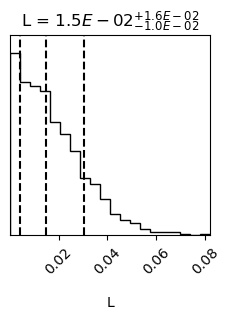

4


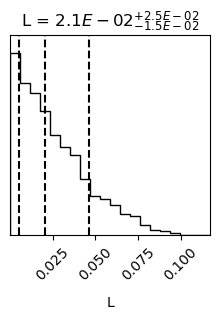

5


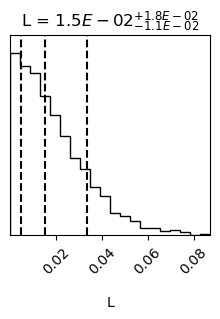

6


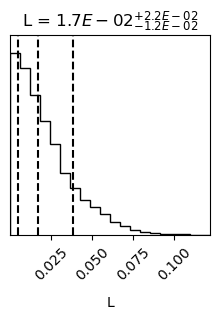

7


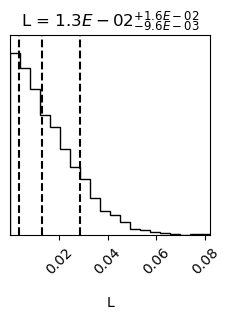

8


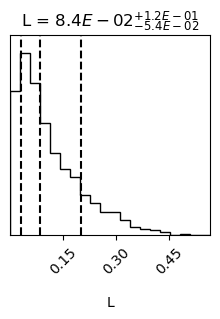

9


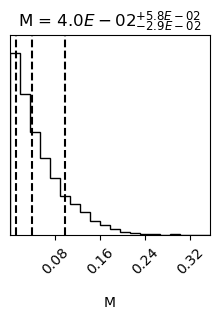

10


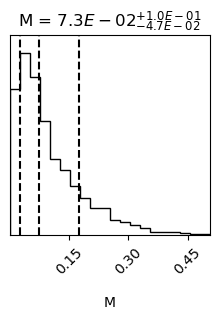

11


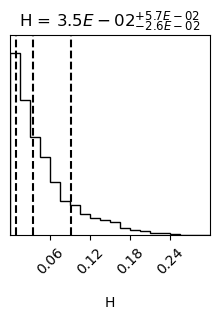

12


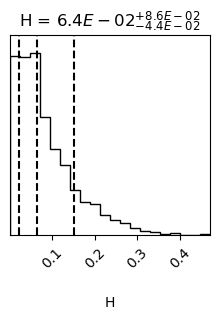

13


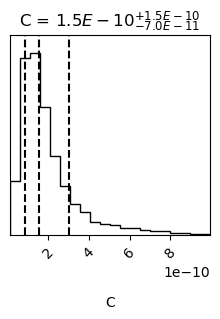

14


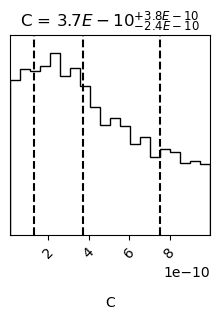

15


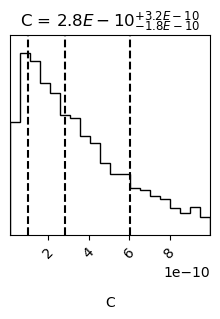

16


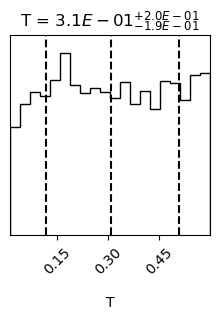

17


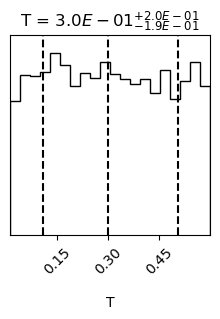

18


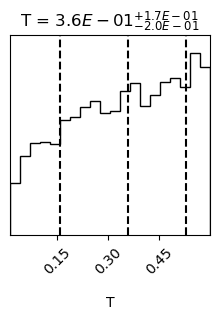

In [16]:
for i in range(flat_chain.shape[1]):
    print(i)
    fig = corner.corner(flat_chain[:, i:i+1], labels=labels[i]
                        , quantiles=[0.16, 0.5, 0.84], show_titles=True
                        ,title_fmt='0.1E')
    plt.show()

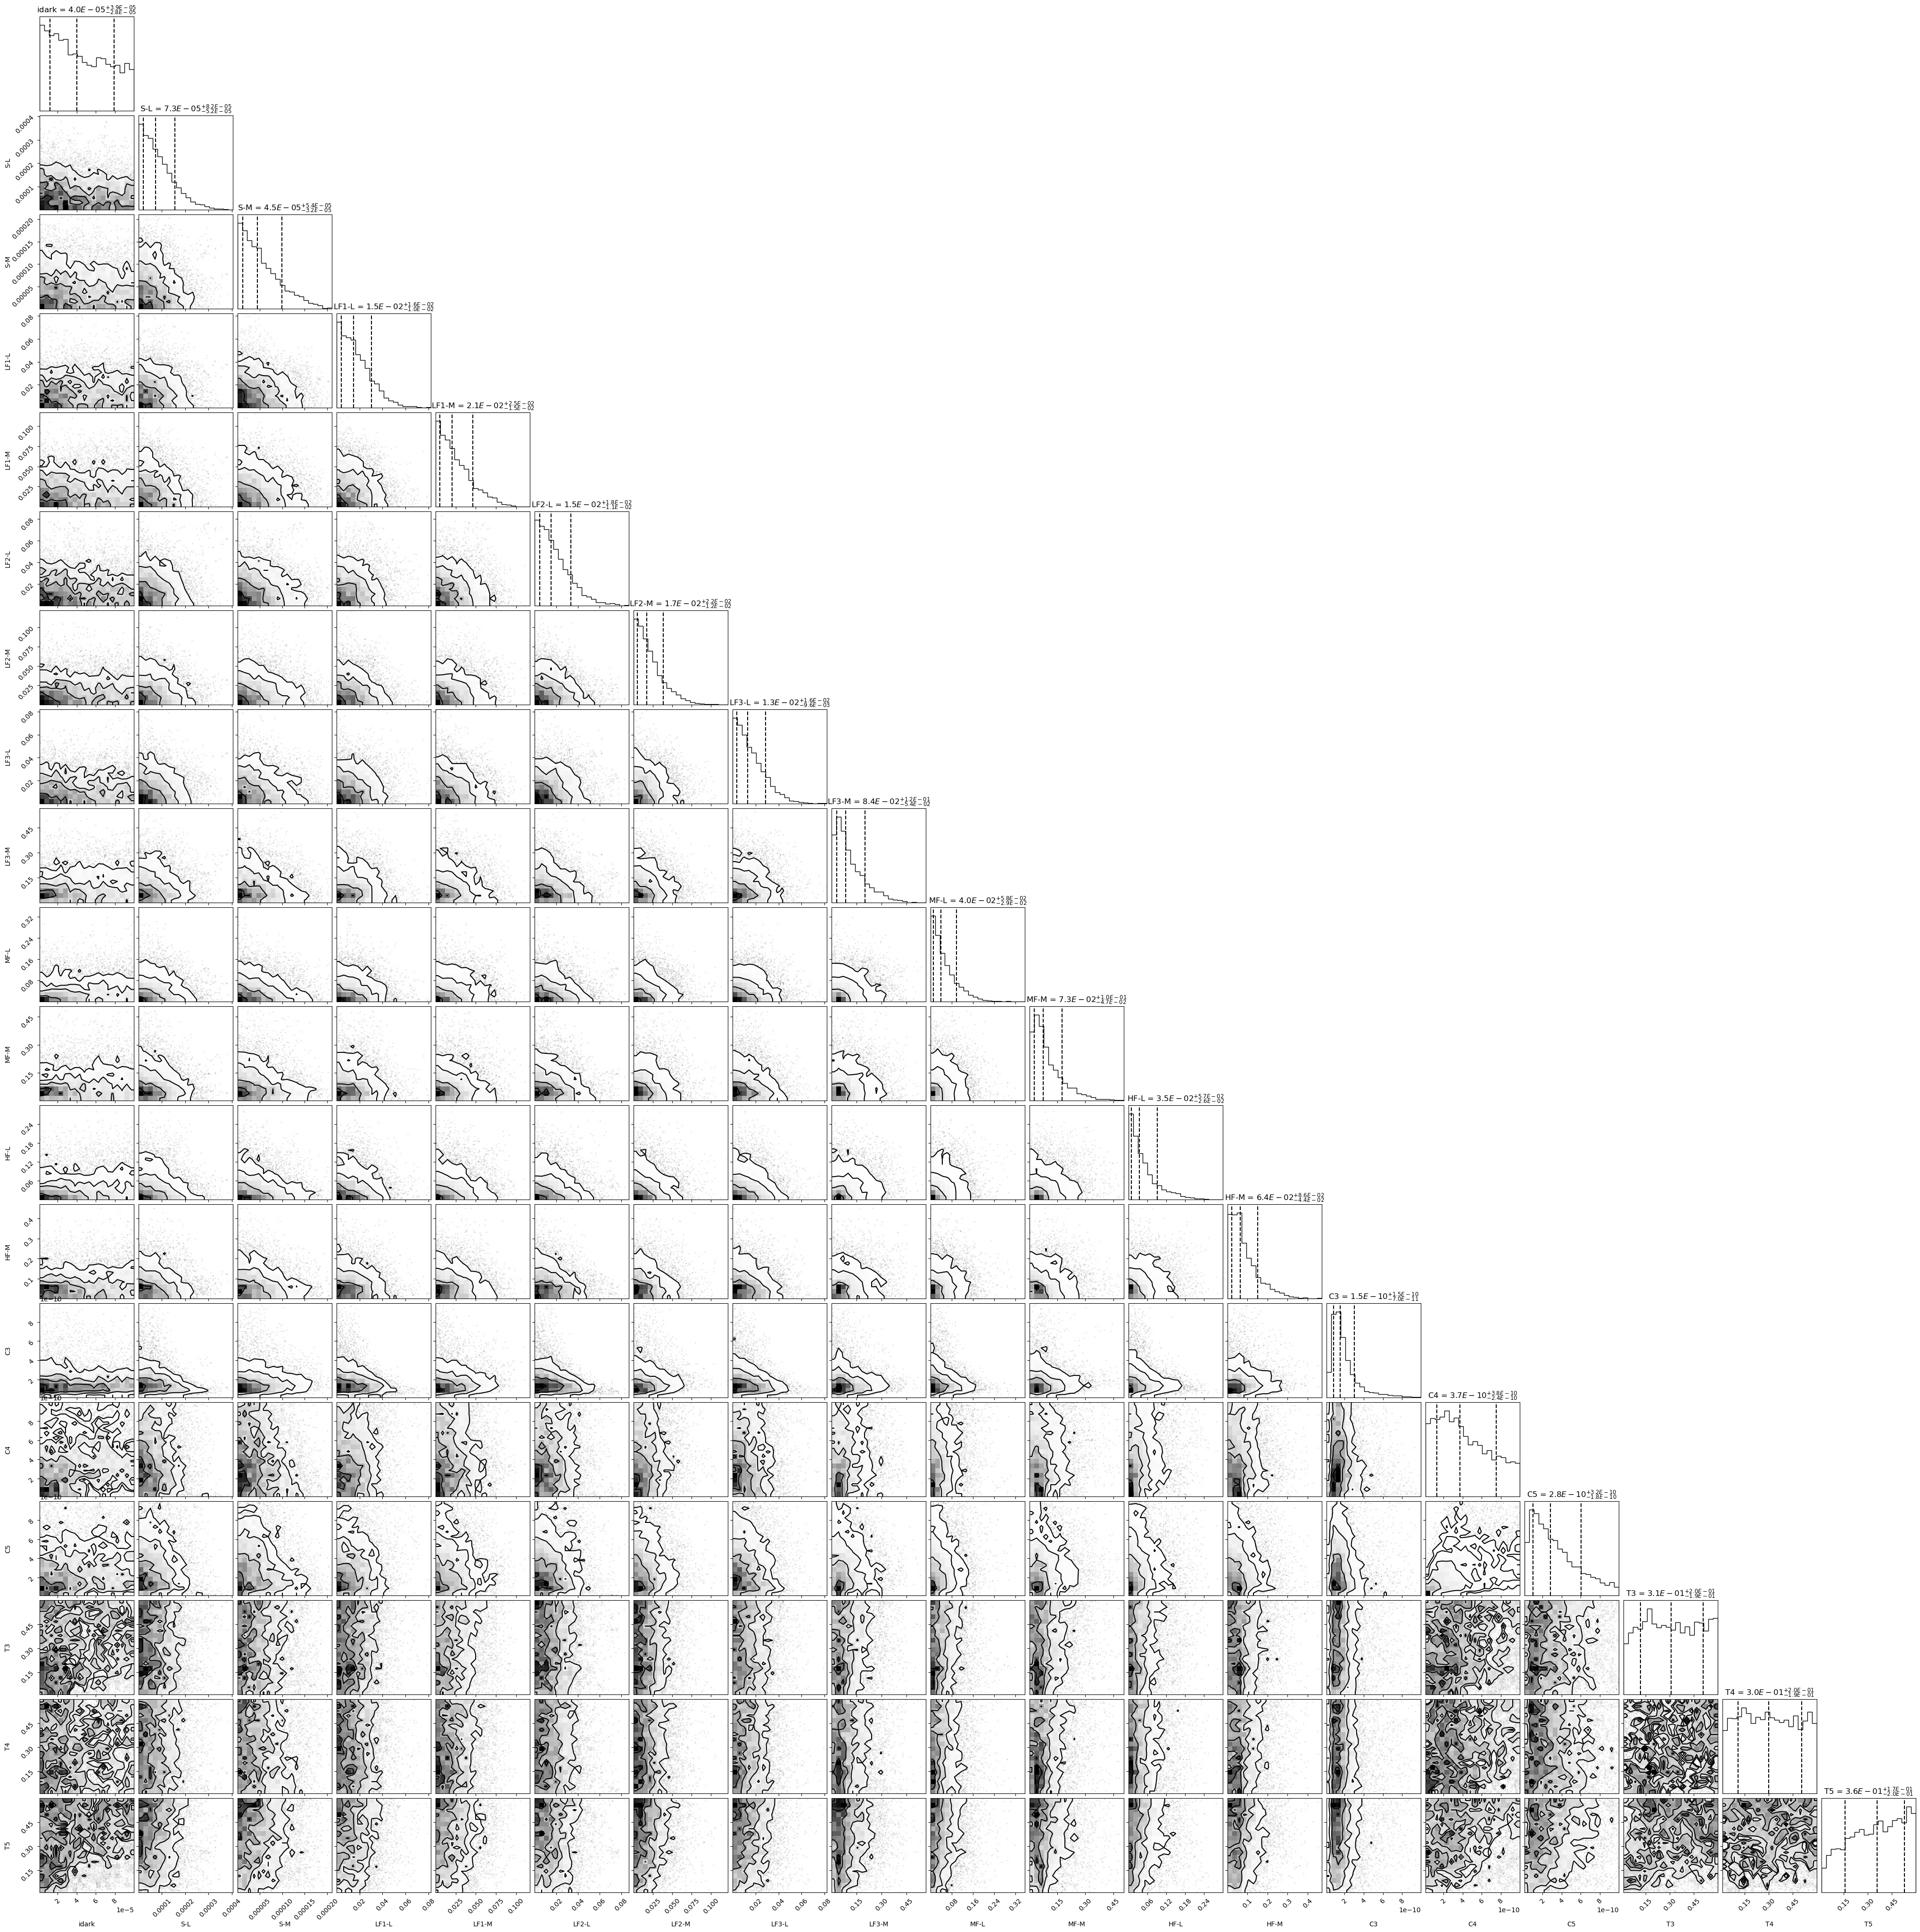

In [17]:
fig = corner.corner(flat_chain
                    , labels=labels
                    , quantiles=[0.16, 0.5, 0.84]
                    , show_titles=True
                    , title_kwargs={"fontsize": 12}
                    , title_fmt=".1E")

# plt.savefig(os.path.join(folder, 'corner_quartiles_new.png'))
plt.show()

In [18]:
blobs = reader.get_blobs(discard=discard, flat=True
                         , thin=int(tau.min()/thin_factor))

In [19]:
print(blobs['int_time'].shape)

(5168, 1, 3)


In [20]:
int_time_flat = blobs['int_time'][:, 0, :]
print(int_time_flat.shape)

(5168, 3)


In [21]:
var_ndx = 13
sift_ndx = np.where(flat_chain[:, var_ndx]==flat_chain[:, var_ndx].max())
print(len(sift_ndx[0]))
print(sift_ndx)

1
(array([707]),)


In [22]:
for m in range(len(sift_ndx[0])):
    for i in range(ndim): 
        print(f"{i}\t{flat_chain[sift_ndx[0][m]][i]:.1E}") 
    print(f"int_time: {int_time_flat[sift_ndx[0][m]]}")

0	2.2E-05
1	2.0E-05
2	7.2E-05
3	5.2E-03
4	8.7E-03
5	3.0E-03
6	2.4E-02
7	7.2E-03
8	1.8E-02
9	7.1E-03
10	9.4E-02
11	1.5E-02
12	1.0E-02
13	1.0E-09
14	1.0E-10
15	2.3E-10
16	3.3E-01
17	1.1E-01
18	4.5E-02
int_time: [ 0.53746437  7.84516172 22.96491576]


In [23]:
var_ndx = 10
sift_ndx = np.where(flat_chain[:, var_ndx]==flat_chain[:, var_ndx].max())
print(sift_ndx)

(array([4586]),)


In [24]:
for m in range(len(sift_ndx[0])):
    for i in range(ndim): 
        print(f"{i}\t{flat_chain[sift_ndx[0][m]][i]:.1E}") 
    print(f"int_time: {int_time_flat[sift_ndx[0][m]]}")

0	3.2E-06
1	6.6E-05
2	2.0E-05
3	1.7E-02
4	3.3E-02
5	1.5E-02
6	2.0E-02
7	1.9E-02
8	2.0E-01
9	6.9E-02
10	5.1E-01
11	2.3E-02
12	1.2E-01
13	2.2E-10
14	3.5E-10
15	3.9E-10
16	1.6E-01
17	2.6E-01
18	4.0E-01
int_time: [5.01671064 4.02782207 5.70630785]


In [25]:
for dim in range(ndim):
    print(f"{dim}\t{corner.quantile(flat_chain[:, dim], [0.16, 0.5, 0.84])}")

0	[1.18469927e-05 3.99749510e-05 7.90317832e-05]
1	[2.11033546e-05 7.32547841e-05 1.55416864e-04]
2	[1.27392150e-05 4.48877368e-05 9.93126178e-05]
3	[0.00409764 0.01459711 0.0305521 ]
4	[0.00555858 0.02067898 0.04601341]
5	[0.00458159 0.01542522 0.03342859]
6	[0.004944   0.0168684  0.03848175]
7	[0.00364611 0.01321513 0.02878514]
8	[0.03004443 0.08420918 0.20012381]
9	[0.01044119 0.03965255 0.09782642]
10	[0.02598656 0.07257639 0.17578345]
11	[0.00899128 0.03454187 0.09154163]
12	[0.02079798 0.06439879 0.14994152]
13	[8.35964370e-11 1.53648659e-10 2.99355654e-10]
14	[1.27500760e-10 3.71988423e-10 7.51070791e-10]
15	[1.00911349e-10 2.81242374e-10 6.02999027e-10]
16	[0.1159173  0.30803795 0.50975771]
17	[0.10829379 0.29998836 0.5048882 ]
18	[0.15684357 0.35839025 0.53020736]


In [28]:
sel_vars = [10, 13, 16, 17, 18]
var_cutoff = [0.2, 3e-10, 0.15, 0.3, 0.4]
cutoff_type = ['lower', 'lower', 'upper', 'upper', 'upper']
int_time_cutoff = 5.0
ndx = np.ones_like(flat_chain[:, 0])
for j, var in enumerate(sel_vars):
    if cutoff_type[j] == 'lower':
        ndx *= np.where(flat_chain[:, var]>var_cutoff[j], 1, 0)
    elif cutoff_type[j]  == 'upper':
        ndx *= np.where(flat_chain[:, var]<var_cutoff[j], 1, 0)
mean_int_time = np.mean(blobs['int_time'][:, 0, :], axis=1)
ndx *= np.where(mean_int_time<int_time_cutoff, 1, 0)
ndx = np.where(ndx>0)
sel_chain = flat_chain[ndx]
sel_blobs = blobs[ndx]
print(sel_chain.shape)
print(sel_blobs.shape)

(1, 19)
(1,)


In [29]:
print(sel_chain)

[[4.50654658e-05 1.55658322e-05 1.15274223e-05 1.48317226e-03
  5.68623778e-02 1.57478470e-02 7.01447619e-02 9.44879599e-03
  7.58290891e-02 6.69609542e-02 2.25679860e-01 5.13264266e-02
  1.02847442e-01 3.61812113e-10 5.16615564e-10 3.01536796e-10
  1.30393874e-01 2.93376276e-01 2.94752790e-01]]


In [ ]:
flat_chain[:, 0].shape

In [ ]:
import ebs.log_pdf as lp

In [ ]:
x = np.linspace(0, 10.0, 64)
y = [np.exp(lp.chi_square(val, 1.0, 2.0)) for val in x]
plt.plot(x, y)
plt.grid(True, 'both')
plt.show()